In [1]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize


# Optimizing Neural Network Performance: Exploring Hyperparameters

# Introduction

As the field of artificial intelligence continues to advance, the importance of optimizing neural networks and there architectures becomes more and more important. Neural networks are powerful tools capable of learning complex patterns and relationships in data but their performance heavily relies on correctly tuning various hyperparameters. These parameters include learning rate, batch size, activation functions, and network depth, all strongly impact the network's ability to generalize and achieve desired outcomes.

Optimizing these hyperparameters is can be seen the same as tuning the engine of a car for it to reach its peak performance. Without the right settings the network may struggle to converge, suffer from overfitting, or fail to capture crucial patterns in the data. Therefore, finding the optimal combination of hyperparameters is a critical step in building effective neural network models.

In this project, I aim to start to dive into the world of hyperparameter optimization by designing a comprehensive experiment. We will explore the effects of different hyperparameters on the performance of neural networks on the fashion_mnist dataset. By systematically adjusting these parameters and measuring their impact on metrics such as accuracy, loss, and convergence speed, we seek to uncover insights that can guide practitioners in building better neural network models.

# EDA

The Fashion-MNIST dataset comprises 60,000 training images and 10,000 test images showcasing various fashion and clothing items, categorized into 10 classes. Each image is grayscale and standardized to a size of 28x28 pixels, totaling 784 pixels. Zalando developed Fashion-MNIST as a suitable alternative to the MNIST dataset, originally featuring handwritten digits.  Below is my code loading on the dataset.

In [2]:
np.random.seed(5)
mnist = keras.datasets.fashion_mnist
data=mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Due to the dataset being created for machine learniong purposes there is a built in function load_data() that seprates the imagesand labels into predefined train test sets.

In [3]:
mnist = keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

Since we know that the dataset contains 10 separate categorys lets define what each label represents and see what some of them look like

label Representaion:
* 0: T-shirt/top
* 1: Trouser
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

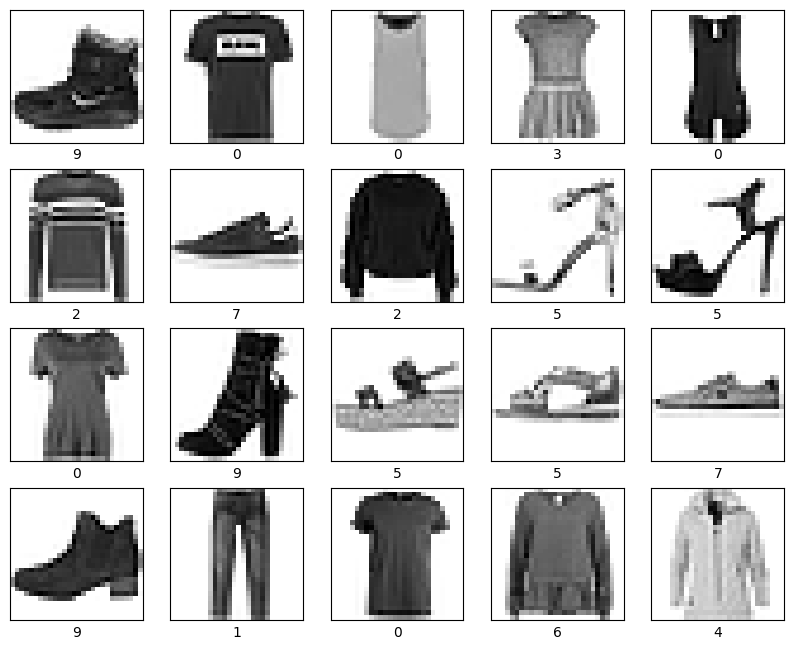

In [4]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

**The need to Normalize the data set:**

Normalizing the Fashion-MNIST dataset is essential for optimizing the training process and improving the performance of machine learning models. By scaling the features to a similar range, normalization facilitates faster convergence during training, as it prevents features with larger scales from dominating the learning process. Additionally, normalization helps mitigate issues like vanishing or exploding gradients, which can occur when features have significantly different scales. This ensures smoother and more stable training, enhancing the model's ability to learn from the data effectively. Moreover, normalizing the dataset promotes model robustness by making the model less sensitive to variations and outliers in the input features. It also aids in interpreting the model's behavior and understanding the relative importance of different features, ultimately contributing to better model performance and generalization to unseen data. Below is my code that normalizes the data and reasigns the labels.

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Neural Network breakdown and Hyperparameter testing

Neural networks are a type of machine learning model inspired by the human brain’s structure and function. They consist of interconnected nodes, or “neurons,” organized into layers. These networks are trained on data to recognize patterns and make predictions. The applications include but are not limited to image and speech recognition, natural language processing and enabling autonomous vehicles.

**Neural Network component break down**

1. **Neurons**: These are the basic units of a neural network. Each neuron receives input, processes it with a certain function (usually involving weights and biases), and produces an output.

2. **Layers**: Neurons are organized into layers. The input layer receives data, the output layer produces the final output, and any layers in between are called hidden layers. Deep neural networks have many hidden layers, hence the term "deep learning."

3. **Connections**: Neurons in one layer are connected to neurons in the next layer. Each connection has an associated weight, which determines the strength of influence one neuron has on another.

4. **Activation function**: This function determines whether a neuron "fires" (produces an output) based on its input. Common activation functions include sigmoid, tanh, and ReLU (Rectified Linear Unit).

5. **Training**: Neural networks are trained using a process called backpropagation, where the network learns from examples by adjusting the weights and biases to minimize the difference between its predictions and the actual targets.

6. **Loss function**: This function measures the difference between the predicted output and the actual target. During training, the goal is to minimize this difference.

7. **Optimization algorithm**: This algorithm is used to update the weights and biases during training. Common optimization algorithms include stochastic gradient descent (SGD), Adam, and RMSprop.

8. **Types of neural networks**: There are various architectures of neural networks, including feedforward neural networks (the simplest type), convolutional neural networks (CNNs) for image recognition, recurrent neural networks (RNNs) for sequential data, and more advanced architectures like transformers for natural language processing.

The HyperParameters we will be testing and tuning are the Optimizatio Algorithm and the Loss function used in the construction of the neiral network


**Definition of General model used for testing:**

Three dense fully connected layers are what makes up the model
* The first layer has 128 units and uses ReLU activation.
* The second layer  also has 128 units and uses ReLU activation.
A dropout layer with a dropout rate of 0.25 was also added to help prevent overfitting from occuring.
* The final output layer has 10 units due to the corresponding 10 classes and uses softmax activation to enable multi-class classification.

Epochs: 10

Batch Size: 512

# Optimization algorithm Parameter testing

The first model tested is compiled with categorical cross-entropy loss, the Adam optimizer, and accuracy as the metric for evaluation.

In [6]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 7s 30ms/step - loss: 0.7522 - accuracy: 0.7411
Epoch 2/10
118/118 [===========================

The second model we will be testing has the exact same structure except with the SGD optimizer

In [7]:


model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()



batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)



test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 2s 10ms/step - loss: 1.8830 - accuracy: 0.4058
Epoch 2/10
118/118 [=========================

The third model uses RMSprop as the optimizer

In [8]:


model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()



batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)



test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 2s 10ms/step - loss: 0.7856 - accuracy: 0.7237
Epoch 2/10
118/118 [=========================

**Analyzing the performace of the models:**

**Adam Optimizer:**

The model utilizing the Adam optimizer demonstrates the highest test accuracy of approximately 87.89% and the lowest test loss of 0.3351.
Adam is an adaptive optimization algorithm that adjusts the learning rate for each parameter individually, based on estimates of the first and second moments of the gradients.
Its adaptive nature allows it to dynamically adapt the learning rates during training, which often leads to faster convergence and better generalization.
The superior performance of Adam in this context suggests that its adaptive learning rate mechanism effectively navigates the optimization landscape, enabling the model to converge to a better solution.

**SGD (Stochastic Gradient Descent) Optimizer**:
The model utilizing SGD as its optimizer achieves the lowest test accuracy of about 78.89% and the highest test loss of 0.6182.
SGD is a classic optimization algorithm that updates the model parameters based on the gradient of the entire training dataset.
While SGD is simple and computationally efficient, it can struggle with convergence, particularly in complex optimization landscapes.
The lower performance observed with SGD in this scenario suggests that its reliance on the entire dataset for learning updates may lead to slower convergence and suboptimal solutions.

**RMSprop Optimizer:**
The model using the RMSprop optimizer achieves moderate performance by having  a test accuracy of around 82.89% and a test loss of 0.4709.
RMSprop is an adaptive optimization algorithm similar to Adam, but it adjusts the learning rate differently by dividing the gradient by a moving average of its recent magnitude.
By adapting the learning rates separately for each parameter, RMSprop aims to address the limitations of vanilla SGD, such as slow convergence and oscillations in the learning rate.
While RMSprop offers improvements over plain SGD, it generally falls short of the performance achieved by Adam due to differences in how it adapts the learning rates.

In summary, this comparison highlights the critical role of optimizer selection in determining the model's learning dynamics and ultimatley the models performance. While Adam demonstrates superior performance in this scenario, RMSprop still is a viable alternative due to the improved convergence compared to plain SGD. The choice of optimizer should be made based on factors such as the complexity of the optimization landscape, computational efficiency, and desired trade-offs between convergence speed and generalization performance.

# Loss Function Parameter testing

The first model tested is compiled with categorical cross-entropy as the Loss

In [9]:


model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)



test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 2s 11ms/step - loss: 0.7535 - accuracy: 0.7358
Epoch 2/10
118/118 [=========================

testing with mse as loss

In [10]:


model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()



batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)



test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 2s 11ms/step - loss: 0.0361 - accuracy: 0.7432
Epoch 2/10
118/118 [=========================

testing with mae loss function

In [11]:


model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model.summary()


batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)


test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 2s 13ms/step - loss: 0.0759 - accuracy: 0.6486
Epoch 2/10
118/118 [=========================

**Analyzing the performace of the models:**

While the optimizer remains consistent with the best performing model from our previous analysis the choice of loss function impacts the model's training dynamics and final performance metrics. The model utilizing MSE loss achieves the lowest test loss and second-highest accuracy among the three models tested. However Model 1 which is using categorical cross-entropy loss, achieves the highest accuracy but with a slightly higher test loss compared to Model 2. Finally model 3 using MAE loss showcases the lowest accuracy and a comparatively higher test loss. These findings underscore the imporatnce of the diverse dynamics of  optimizer selection and loss function choice in influencing neural network performance. While Adam consistently performs well as an optimizer, the choice of loss function should be tailored to the specific requirements of the problem domain and the desired interpretation of the model's output. Overall, this comparison highlights the importance of thoughtful selection of both optimizer and loss function to achieve optimal performance in neural network training.

**Conclusion**

The project explores hyperparameter optimization for neural networks using the Fashion-MNIST dataset. The focus is on the impact of different loss functions when using the Adam optimizer. Three models were tested with categorical cross-entropy, MSE, and MAE loss functions. The model with MSE loss achieved the lowest test loss and the second-highest accuracy, while the model with categorical cross-entropy loss had the highest accuracy but a slightly higher test loss. The model with MAE loss had the lowest accuracy and a higher test loss. This comparison highlights the importance of selecting an appropriate loss function tailored to the problem domain and desired output interpretation, even when using a well-performing optimizer like Adam.